# Exploratory Data Analysis - Multiclass Classification

# 1. Data and Package Import

In [184]:
import pandas as pd 
import numpy as np
import skimpy as skim
import matplotlib.pyplot as plt
import seaborn as sns
import os 

import warnings 
warnings.filterwarnings("ignore")

In [100]:
df_train = pd.read_csv("../data/train.csv", delimiter = ",",header = 0)
df_test = pd.read_csv("../data/test.csv")

# 2. Database description and first visualizations. 

## 2.1. Overall Information

In [101]:
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1055.0,NaN,19724.0,F,NaN,NaN,NaN,N,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3.0,C
1,1,3282.0,Placebo,17884.0,F,N,Y,Y,N,0.7,309.0,3.60,96.0,1142.0,71.3,106.0,240.0,12.4,4.0,C
2,2,1653.0,NaN,20600.0,F,NaN,NaN,NaN,N,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2.0,C
3,3,999.0,D-penicillamine,22514.0,F,N,Y,N,N,1.0,498.0,3.35,89.0,1601.0,164.3,85.0,394.0,9.7,3.0,C
4,4,2202.0,NaN,17897.0,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3.0,C


In [102]:
df_train.shape

(15000, 20)

In [103]:
df_train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6669.000000,15000.000000,8452.000000,8558.000000,8555.000000,6630.000000,14414.000000,14974.000000,15000.000000
mean,7499.500000,1966.998733,19248.502373,1.861462,327.670115,3.525314,74.715689,1667.605282,106.579545,110.297097,253.822027,10.627748,3.025667
std,4330.271354,1355.897299,3697.546749,2.752375,179.801705,0.369981,74.211915,1861.746315,56.493338,49.676146,94.074989,0.741888,0.877796
min,0.000000,3.000000,133.300000,0.300000,120.000000,1.800000,4.000000,16.000000,8.000000,33.000000,0.400000,7.100000,1.000000
25%,3749.750000,1092.000000,16374.000000,0.600000,242.000000,3.290000,31.000000,721.000000,71.000000,80.000000,183.000000,10.100000,2.000000
50%,7499.500000,1785.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.000000,10.600000,3.000000
75%,11249.250000,2635.000000,22369.000000,1.800000,360.000000,3.770000,86.000000,1691.250000,133.300000,133.000000,312.000000,11.000000,4.000000
max,14999.000000,40795.000000,35472.000000,28.000000,1790.000000,4.640000,588.000000,19270.000000,2148.000000,598.000000,724.000000,18.000000,4.000000


In [104]:
df_train.dtypes

id                 int64
N_Days           float64
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [105]:
# Missing Values
df_train.isna().sum()/len(df_train)*100

id                0.000000
N_Days            0.000000
Drug             42.906667
Age               0.000000
Sex               0.000000
Ascites          42.913333
Hepatomegaly     42.906667
Spiders          42.966667
Edema             0.000000
Bilirubin         0.000000
Cholesterol      55.540000
Albumin           0.000000
Copper           43.653333
Alk_Phos         42.946667
SGOT             42.966667
Tryglicerides    55.800000
Platelets         3.906667
Prothrombin       0.173333
Stage             0.000000
Status            0.000000
dtype: float64

In [106]:
skim.skim(df_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15000  │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 20     │ │ string      │ 7     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA   ┃ NA %              ┃ mean  ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ id            │    0 │                 0 │  7500 │   4330 │     0 │  3750 │  7500 │ 11250 │ 15000 │ ██████ │  │
│ │ N_Days        │    0 │                 0 │  1967 │   1356 │     3 │  1092 │  1785 │  2635 │ 40800 │   █    │  │
│ │ Age           │    0 │                 0 │ 19250 │   3698 │ 133.3 │ 16370 │ 19540 │ 22370 │ 35470 │   ▅█▁  │  │
│ │ Bilirubin     │    0 │                 0 │ 1.861 │  2.752 │   0.3 │   0.6 │   0.9 │   1.8 │    28 │   █    │  │
│ │ Cholesterol   │ 8331 │             55.54 │ 327.7 │  179.8 │   120 │   242 │   280 │   360 │  1790 │   █▂   │  │
│ │ Albumin       │    0 │                 0 │ 3.525 │   0.37 │   1.8 │  3.29 │  3.58 │  3.77 │  4.64 │   ▃█▅▁ │  │
│ │ Copper        │ 6548 │ 43.65333333333333 │ 74.72 │  74.21 │     4 │    31 │    52 │    86 │   588 │  █▁▁   │  │
│ │               │      │                 6 │       │        │       │       │       │       │       │        │  │
│ │ Alk_Phos      │ 6442 │ 42.94666666666666 │  1668 │   1862 │    16 │   721 │  1072 │  1691 │ 19270 │   █    │  │
│ │               │      │                 5 │       │        │       │       │       │       │       │        │  │
│ │ SGOT          │ 6445 │ 42.96666666666667 │ 106.6 │  56.49 │     8 │    71 │ 97.65 │ 133.3 │  2148 │   █    │  │
│ │ Tryglicerides │ 8370 │              55.8 │ 110.3 │  49.68 │    33 │    80 │    99 │   133 │   598 │   █▃   │  │
│ │ Platelets     │  586 │ 3.906666666666666 │ 253.8 │  94.07 │   0.4 │   183 │   251 │   312 │   724 │  ▁▇█▂  │  │
│ │               │      │                 7 │       │        │       │       │       │       │       │        │  │
│ │ Prothrombin   │   26 │ 0.173333333333333 │ 10.63 │ 0.7419 │   7.1 │  10.1 │  10.6 │    11 │    18 │   █▅   │  │
│ │               │      │                34 │       │        │       │       │       │       │       │        │  │
│ │ Stage         │    0 │                 0 │ 3.026 │ 0.8778 │     1 │     2 │     3 │     4 │     4 │ ▁ ▅ █▇ │  │
│ └───────────────┴──────┴───────────────────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃      ┃           ┃          ┃          ┃           ┃         ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA   ┃ NA %      ┃ shortest ┃ longest  ┃

**Variables definition**
* ID : Identification of each of the patients.
* N_days : Days since first diagnostic or tratment.
* Drug : Taken treatment. It can be either none, a placebo treatment or a real\
treatment. 
* Age : Age of the patient.
* Sex : Gender of the patient. 
* Ascites : Presence of this element in the body (liquids in the abdomen) with\
possible responses being Yes, No or NA.
* Hepatomegaly : Presence of Hepatomegaly (Liver volume augmentation) with\
possible responses being Yes, No or NA.
* Spiders : Presence of Spider Angioma (Skin vascular injuries) with possible\
responses being Yes, No or NA.
* Edema : Presence of un œdema. We can have categories such as None, Slight, or\
Marked.
* Bilirubin : Level of bilirubin in the blood (mg/dL). This marks the liver\
functions. 
* Cholesterol : Level of cholesterol in the blood (mg/dL). Indicator of  global\
health status or methabolic problems. 
* Albumim : Level of Albumim in the blood (g/dL). Nutrition indicator and liver\
function. 
* Copper : Concentration level of copper in blood or urine (µg/dL). Indicator\
of a Wilson Disease or a methabolic disorder. 
* Alk_Phos : Level of Alkaline phosphatase (UI/L). An indicator of liver function\
or (osseuse)
* SGOT : Transaminase enzyme level (SGOT or AST) (in IU/L), an indicator of damage\
to the liver or other organs.
* Tryglicerides : Level of tryglicerides in blood (mg/dL). Indicator of metabolism\
and lipid. 
* Platelets : Number of platelets in blood (thousands/μL). A coagulation indicator.  
* Prothrombin : Prothrombin time (in seconds or % activity), a coagulation test\
to assess liver function.  
* Stage : Status of the disease based on a classification system (1 to 4). 4\
being the highest level. 
* **Status** : Target variable - Current status of the patient (Alive, Deceased or\
Alive with a transplant)

**Insights**
- Some variables seem to have a similar value of missing values. For example,\
tryglicerides and cholesterol or other variables around 0,43. This will need\
a further analysis in the following section.


## 2.2. Analysis variable per variable for treatment purposes

In [107]:
df_train_clean = df_train.copy()

* *ID* 

In [108]:
# As 'ID' is the same as row number we have decided to drop it. 
df_train_clean = df_train_clean.drop(columns = 'id')

* *N_Days*

In [109]:
# Analysis for number of days
df_train_clean['N_Days'] = df_train_clean['N_Days'].astype('int')

In [110]:
# We see that there may be some aberrant values as 40K days are more than a 
# 100 years. 
df_train_clean['N_Days'].describe()

count    15000.000000
mean      1966.998733
std       1355.897299
min          3.000000
25%       1092.000000
50%       1785.000000
75%       2635.000000
max      40795.000000
Name: N_Days, dtype: float64

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/1503722814.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


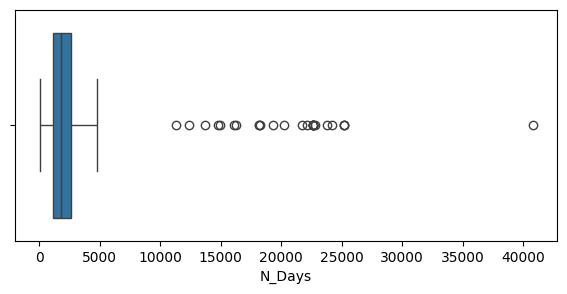

In [111]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(df_train_clean['N_Days'], orient = 'h')
fig.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/2823012003.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


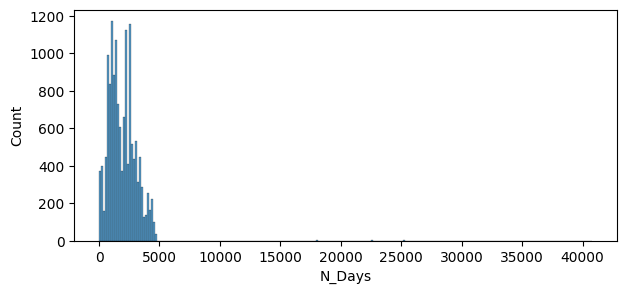

In [112]:
fig = plt.figure(figsize = (7,3))
sns.histplot(df_train_clean['N_Days'])
fig.show()

In [113]:
# Taken into account 'Age' this value is not logic as it is higher than the older
# patient. 
df_train_clean['N_Days'].max()/365

np.float64(111.76712328767124)

In [114]:
df_train['N_Days'].isna().sum()/df_train.shape[0]

np.float64(0.0)

* *Drug*

In [115]:
df_train_clean['Drug'].value_counts(dropna = False, normalize = True)

Drug
NaN                0.429067
D-penicillamine    0.304533
Placebo            0.266400
Name: proportion, dtype: float64

In [116]:
df_train_clean['Drug'] = df_train_clean['Drug'].fillna('Unknown')

* *Age*

In [117]:
df_train_clean['Age'].describe()

count    15000.000000
mean     19248.502373
std       3697.546749
min        133.300000
25%      16374.000000
50%      19544.000000
75%      22369.000000
max      35472.000000
Name: Age, dtype: float64

In [118]:
# Age of the pacient is lower than the days of treatment.
df_train_clean[df_train_clean['Age'] < df_train_clean['N_Days']] 

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
1263,2995,Placebo,2990.0,F,N,N,N,N,0.9,314.0,3.48,18.0,1164.0,71.00,260.0,340.0,10.0,2.0,C
4216,2504,D-penicillamine,133.3,F,N,N,N,N,2.1,NaN,3.00,24.0,1828.0,133.30,NaN,474.0,10.1,3.0,C
5860,3445,D-penicillamine,133.3,F,N,Y,N,N,2.3,NaN,3.61,39.0,1828.0,133.30,NaN,123.0,10.3,4.0,D
14686,13728,Placebo,13727.0,F,Y,Y,N,Y,12.2,373.0,2.94,150.0,1029.0,119.35,151.0,399.0,11.6,4.0,D
14692,40795,D-penicillamine,17874.0,F,N,N,Y,N,1.4,486.0,3.45,32.0,2201.0,117.80,70.0,410.0,11.7,3.0,C


In [119]:
df_train_clean.drop(df_train_clean[df_train_clean['Age'] < df_train_clean['N_Days']].index, inplace=True)

In [120]:
df_train_clean['Age'] = round(df_train_clean['Age'] / 365, 0).astype('int')

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/394179953.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


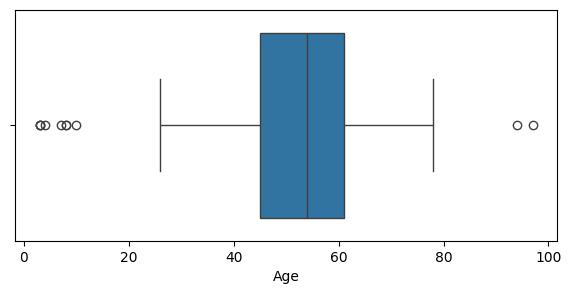

In [121]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(df_train_clean['Age'], orient = 'h')
fig.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/1769251674.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


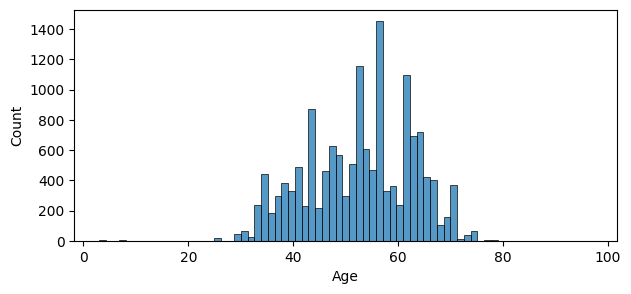

In [122]:
fig = plt.figure(figsize = (7,3))
sns.histplot(df_train_clean['Age'])
fig.show()

In [123]:
df_train_clean['Age'].isna().sum()/df_train_clean.shape[0]

np.float64(0.0)

* *Sex*

In [124]:
# Most of the pacients are womens. There are not NaN
df_train_clean['Sex'].value_counts(dropna = False, normalize = True)

Sex
F    0.960187
M    0.039813
Name: proportion, dtype: float64

* *Ascites*

In [125]:
# Consider S, NaN, D-penicillamine
df_train_clean['Ascites'].value_counts(dropna = False, normalize = True)

Ascites
N                  0.545115
NaN                0.429276
Y                  0.025475
S                  0.000067
D-penicillamine    0.000067
Name: proportion, dtype: float64

In [126]:
df_train_clean[(df_train_clean['Ascites'] == 'S')|(df_train_clean['Ascites']== 'D-penicillamine')]

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
6245,552,Placebo,61,F,S,Y,Y,S,3.6,375.0,3.35,4.0,1110.0,96.1,432.0,354.0,12.4,2.0,D
7046,3239,D-penicillamine,56,F,D-penicillamine,N,N,N,0.6,271.0,3.80,210.0,6456.2,120.9,55.0,467.0,11.0,3.0,C


In [127]:
df_train_clean['Ascites'] = np.where((df_train_clean['Ascites'] == 'S')|(df_train_clean['Ascites']== 'D-penicillamine'), np.nan,df_train_clean['Ascites'] )

In [128]:
df_train_clean['Ascites']  = df_train_clean['Ascites'].fillna('N')

* *Hepatomegaly*

In [129]:
# Consider NaN and 119.35 as NaN ? 
df_train_clean['Hepatomegaly'].value_counts(dropna = False, normalize = True)

Hepatomegaly
NaN       0.429210
N         0.304168
Y         0.266556
119.35    0.000067
Name: proportion, dtype: float64

In [130]:
df_train_clean[df_train_clean['Hepatomegaly'] == '119.35']

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
2198,110,Placebo,61,F,Y,119.35,Y,Y,17.4,NaN,2.31,182.0,1029.0,119.35,NaN,401.0,12.2,4.0,D


In [131]:
df_train_clean['Hepatomegaly'] = np.where(df_train_clean['Hepatomegaly']== '119.35',
                                            np.nan,
                                            df_train_clean['Hepatomegaly'] )

In [132]:
df_train_clean['Hepatomegaly'] = df_train_clean['Hepatomegaly'].fillna('Unknown') 

* *Spiders*

In [133]:
# Clean but nature of NaN ? 
df_train_clean['Spiders'].value_counts(dropna = False, normalize = True)

Spiders
N      0.451417
NaN    0.429810
Y      0.118773
Name: proportion, dtype: float64

In [134]:
df_train_clean['Spiders'] = df_train_clean['Spiders'].fillna('Unknown')

* *Edema*

In [135]:
# S Meaning  
df_train_clean['Edema'].value_counts(dropna = False, normalize = True)

Edema
N    0.921574
S    0.054085
Y    0.024341
Name: proportion, dtype: float64

In [136]:
# Here the M seems plausible and may stand for Slight. 
df_train_clean[df_train_clean['Edema'] == 'S']

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
56,223,D-penicillamine,62,M,N,Y,Y,S,2.8,260.0,3.37,200.0,1110.0,102.30,102.0,210.0,12.4,4.0,D
93,359,Unknown,59,F,N,Unknown,Unknown,S,0.8,NaN,3.04,NaN,NaN,NaN,NaN,142.0,11.2,4.0,D
95,3059,D-penicillamine,54,F,N,N,Y,S,4.0,456.0,4.00,130.0,2120.0,186.00,146.0,447.0,10.9,3.0,D
129,778,Unknown,64,F,N,Unknown,Unknown,S,2.5,NaN,3.15,NaN,NaN,NaN,NaN,142.0,12.3,4.0,D
131,2844,Unknown,54,F,N,Unknown,Unknown,S,1.8,NaN,2.89,NaN,NaN,NaN,NaN,269.0,10.3,3.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14850,1882,Placebo,67,F,N,N,Y,S,1.4,244.0,3.52,43.0,1282.0,100.75,91.0,317.0,10.2,1.0,C
14949,321,Placebo,54,F,N,Y,Y,S,1.2,259.0,3.48,210.0,5487.2,96.10,101.0,254.0,12.7,4.0,D
14961,1170,D-penicillamine,66,F,N,Y,Y,S,5.6,176.0,3.53,138.0,3228.0,106.95,91.0,140.0,12.9,4.0,D
14978,1666,D-penicillamine,48,F,N,Y,Y,S,0.9,242.0,3.70,51.0,944.0,120.90,88.0,NaN,12.0,3.0,C


In [137]:
df_train_clean['Edema'] = df_train_clean['Edema'].fillna('N')

* *Bilirubin*

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/3956150188.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


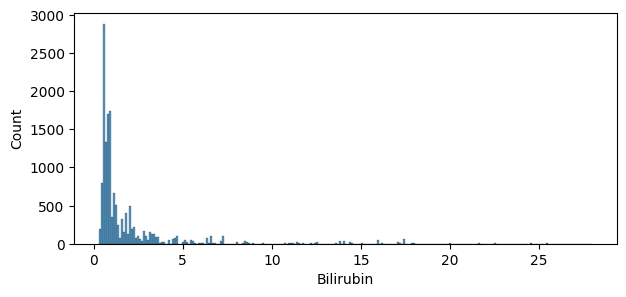

In [138]:
fig = plt.figure(figsize = (7,3))
sns.histplot(df_train_clean['Bilirubin'])
fig.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/563017724.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


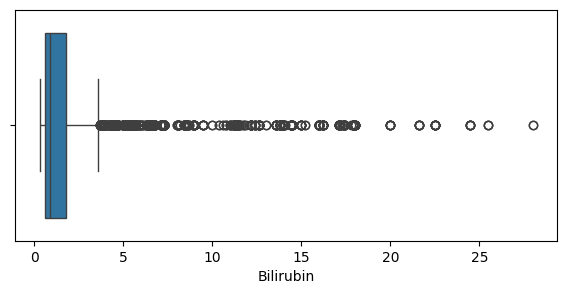

In [139]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(df_train_clean['Bilirubin'], orient = 'h')
fig.show()

In [140]:
df_train_clean['Bilirubin'].isna().sum()/df_train_clean.shape[0]

np.float64(0.0)

* *Cholesterol*

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/2477646891.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


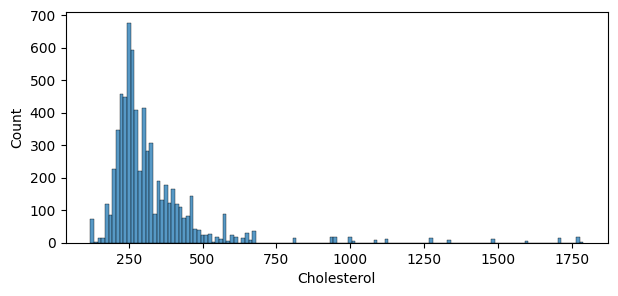

In [141]:
fig = plt.figure(figsize = (7,3))
sns.histplot(df_train_clean['Cholesterol'])
fig.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/1761049576.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


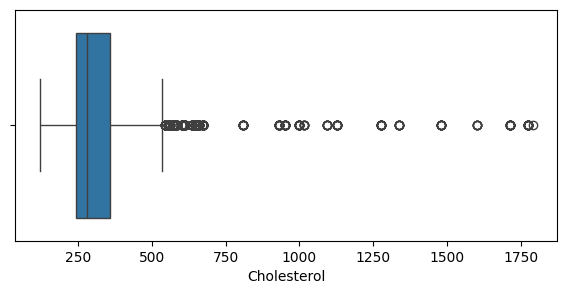

In [142]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(df_train_clean['Cholesterol'], orient = 'h')
fig.show()

In [143]:
df_train_clean['Cholesterol'].isna().sum()/df_train_clean.shape[0]

np.float64(0.5554518172724241)

In [144]:
df_train_clean['Cholesterol'] = df_train_clean['Cholesterol'].fillna(df_train_clean['Cholesterol'].mode(dropna = True)[0])

* *Albumin*

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/1230852928.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


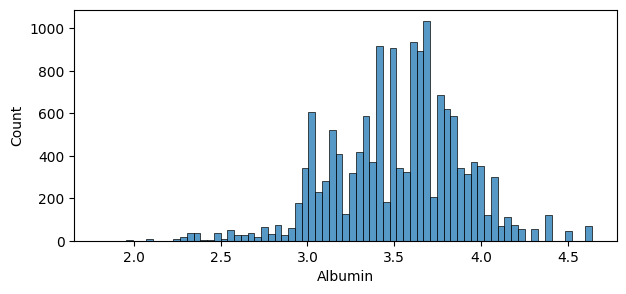

In [145]:
fig = plt.figure(figsize = (7,3))
sns.histplot(df_train_clean['Albumin'])
fig.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/2433652841.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


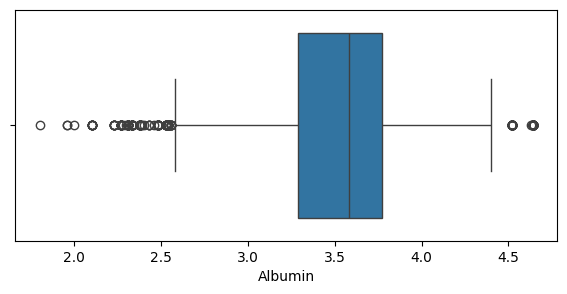

In [146]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(df_train_clean['Albumin'], orient = 'h')
fig.show()

In [147]:
df_train_clean['Albumin'].isna().sum()/df_train_clean.shape[0]

np.float64(0.0)

* *Copper*

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/1240518245.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


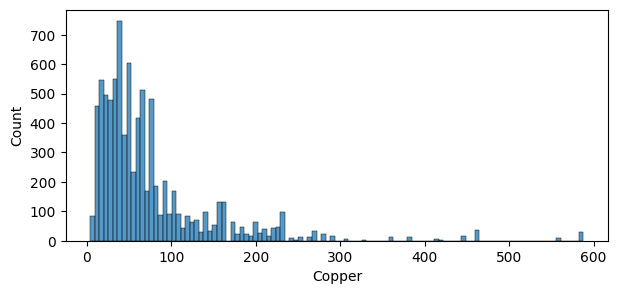

In [148]:
fig = plt.figure(figsize = (7,3))
sns.histplot(df_train_clean['Copper'])
fig.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/1516312591.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


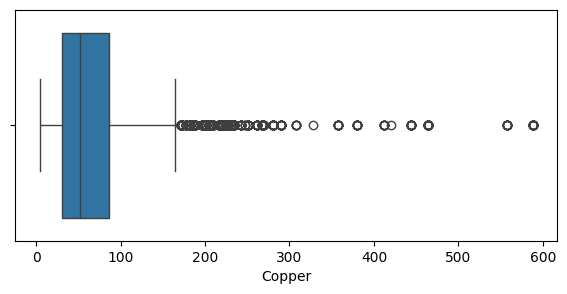

In [149]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(df_train_clean['Copper'], orient = 'h')
fig.show()

In [150]:
df_train_clean['Copper'].isna().sum()/df_train_clean.shape[0]

np.float64(0.43667889296432144)

In [151]:
df_train_clean['Copper'] = df_train_clean['Copper'].fillna(df_train_clean['Copper'].mode(dropna = True)[0])

* *Alk_Phos*

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/3253561046.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


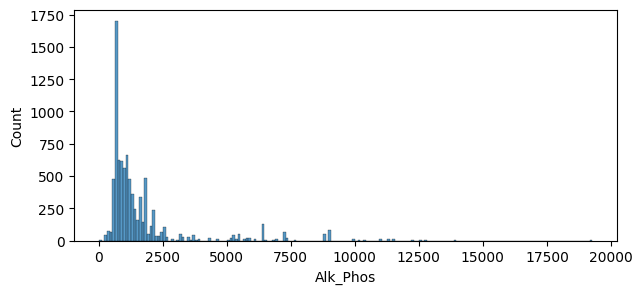

In [152]:
fig = plt.figure(figsize = (7,3))
sns.histplot(df_train_clean['Alk_Phos'])
fig.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/2775246126.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


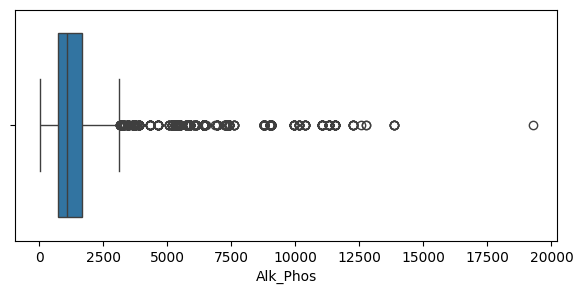

In [153]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(df_train_clean['Alk_Phos'], orient = 'h')
fig.show()

In [154]:
df_train_clean['Alk_Phos'].isna().sum()/df_train_clean.shape[0]

np.float64(0.42960986995665223)

In [155]:
df_train_clean['Alk_Phos'] = df_train_clean['Alk_Phos'].fillna(df_train_clean['Alk_Phos'].mode()[0])

* *SGOT*

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/1080970032.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


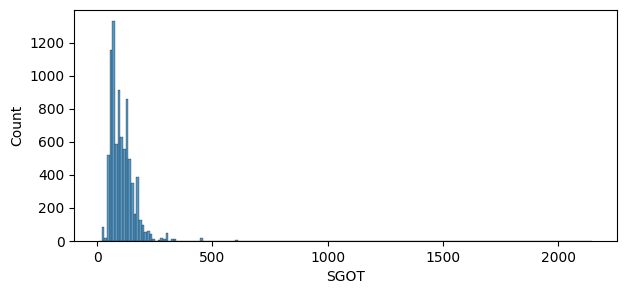

In [156]:
fig = plt.figure(figsize = (7,3))
sns.histplot(df_train_clean['SGOT'])
fig.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/1328568940.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


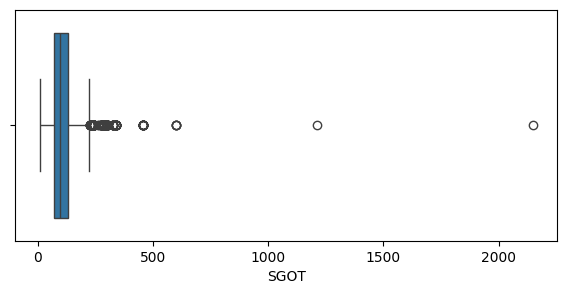

In [157]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(df_train_clean['SGOT'], orient = 'h')
fig.show()

In [158]:
df_train_clean['SGOT'].isna().sum()/df_train_clean.shape[0]

np.float64(0.4298099366455485)

In [159]:
df_train_clean['SGOT'] = df_train_clean['SGOT'].fillna(df_train_clean['SGOT'].mode(dropna = True)[0])

* *Tryglicerides*

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/905387945.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


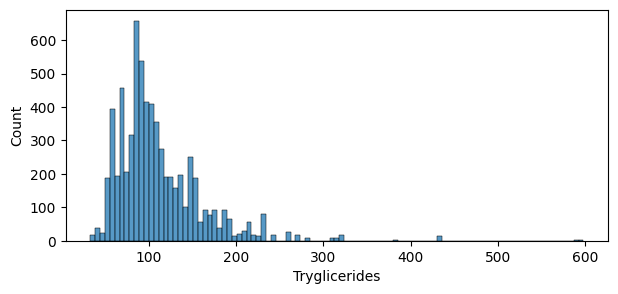

In [160]:
fig = plt.figure(figsize = (7,3))
sns.histplot(df_train_clean['Tryglicerides'])
fig.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/295255718.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


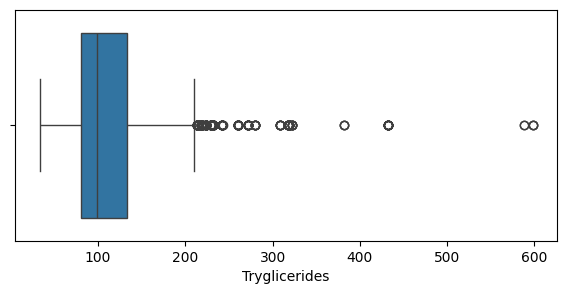

In [161]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(df_train_clean['Tryglicerides'], orient = 'h')
fig.show()

In [162]:
df_train_clean['Tryglicerides'].isna().sum()/df_train_clean.shape[0]

np.float64(0.5580526842280761)

In [163]:
df_train_clean['Tryglicerides'] = df_train_clean['Tryglicerides'].fillna(df_train_clean['Tryglicerides'].mode(dropna = True)[0])

* *Platelets*

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/3716616500.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


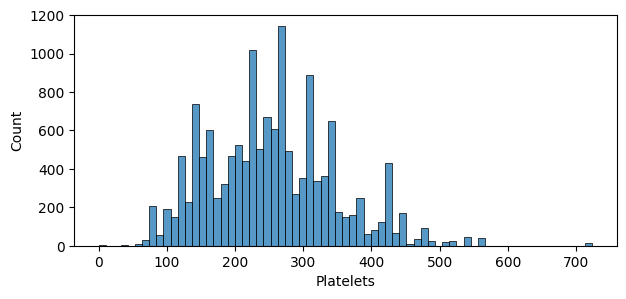

In [164]:
fig = plt.figure(figsize = (7,3))
sns.histplot(df_train_clean['Platelets'])
fig.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/4103243738.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


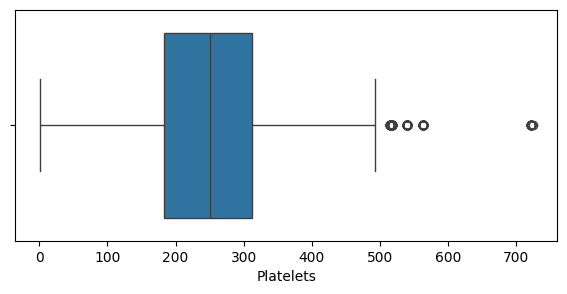

In [165]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(df_train_clean['Platelets'], orient = 'h')
fig.show()

In [166]:
df_train_clean['Platelets'].isna().sum()/df_train_clean.shape[0]

np.float64(0.039079693231077024)

In [167]:
df_train_clean['Platelets'] = df_train_clean['Platelets'].fillna(df_train_clean['Platelets'].mode(dropna = True)[0])

* *Prothrombin*

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/4051609437.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


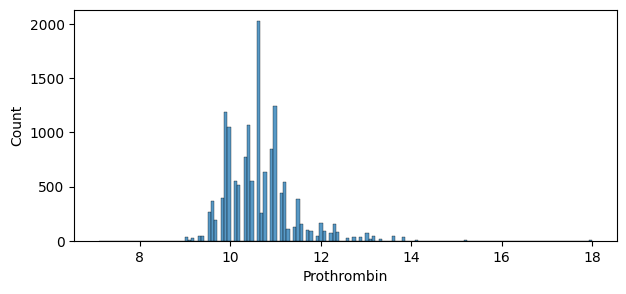

In [168]:
fig = plt.figure(figsize = (7,3))
sns.histplot(df_train_clean['Prothrombin'])
fig.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_30758/69639193.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


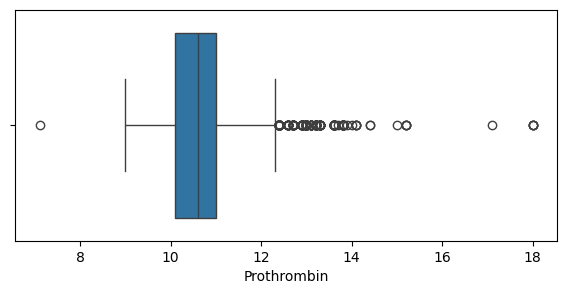

In [169]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(df_train_clean['Prothrombin'], orient = 'h')
fig.show()

In [170]:
df_train_clean['Prothrombin'].isna().sum()/df_train_clean.shape[0]

np.float64(0.0017339113037679226)

In [171]:
df_train_clean['Prothrombin'] = df_train_clean['Prothrombin'].fillna(df_train_clean['Prothrombin'].mode(dropna = True)[0])

* *Stage*

In [172]:
# S Meaning  
df_train_clean['Stage'].value_counts(dropna = False, normalize = True)

Stage
3.0    0.376259
4.0    0.349250
2.0    0.225342
1.0    0.049150
Name: proportion, dtype: float64

In [173]:
df_train_clean['Stage'].isna().sum()/df_train_clean.shape[0]

np.float64(0.0)

* *Status*

In [174]:
# S Meaning  
df_train_clean['Status'].value_counts(dropna = False, normalize = True)

Status
C     0.669957
D     0.303968
CL    0.026075
Name: proportion, dtype: float64

In [175]:
df_train_clean['Status'].isna().sum()/df_train_clean.shape[0]

np.float64(0.0)

## 3. Data Analysis

In [176]:
skim.skim(df_train_clean)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 14995  │ │ float64     │ 10    │                                                          │
│ │ Number of columns │ 19     │ │ string      │ 7     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column            ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0   ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ N_Days            │   0 │      0 │    1963 │     1315 │    3 │   1092 │   1785 │   2635 │  25200 │    █    │  │
│ │ Age               │   0 │      0 │   52.73 │    10.08 │    3 │     45 │     54 │     61 │     97 │   ▁▅█▁  │  │
│ │ Bilirubin         │   0 │      0 │   1.861 │    2.752 │  0.3 │    0.6 │    0.9 │    1.8 │     28 │    █    │  │
│ │ Cholesterol       │   0 │      0 │   291.7 │    124.1 │  120 │    263 │    263 │    266 │   1790 │   █▁    │  │
│ │ Albumin           │   0 │      0 │   3.525 │     0.37 │  1.8 │   3.29 │   3.58 │   3.77 │   4.64 │   ▃█▅▁  │  │
│ │ Copper            │   0 │      0 │   50.83 │    61.97 │    4 │     20 │     20 │     58 │    588 │   █▁    │  │
│ │ Alk_Phos          │   0 │      0 │    1236 │     1492 │   16 │    663 │    663 │   1142 │  19270 │    █    │  │
│ │ SGOT              │   0 │      0 │   85.42 │    49.14 │    8 │  57.35 │  57.35 │  104.5 │   2148 │    █    │  │
│ │ Tryglicerides     │   0 │      0 │   96.17 │    35.31 │   33 │     85 │     85 │     91 │    598 │   █▁    │  │
│ │ Platelets         │   0 │      0 │   254.4 │    92.24 │  0.4 │    190 │    255 │    311 │    724 │  ▁▇█▂   │  │
│ │ Prothrombin       │   0 │      0 │   10.63 │   0.7412 │  7.1 │   10.1 │   10.6 │     11 │     18 │    █▅   │  │
│ │ Stage             │   0 │      0 │   3.026 │   0.8778 │    1 │      2 │      3 │      4 │      4 │ ▁ ▅ █▇  │  │
│ └───────────────────┴─────┴────────┴─────────┴──────────┴──────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃            ┃    ┃      ┃          ┃            ┃           ┃         ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column     ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min       ┃ max     ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Drug       │  0 │    0 │ Unknown  │ D-penicill │ D-penicil │ Unknown │       9.44 │         1 │      14995 │  │
│ │            │    │      │          │ amine      │ lamine    │         │            │           │            │  │
│ │ Sex        │  0 │    0 │ F        │ F          │ F         │ M       │          1 │         1 │      14995 │  │
│ │ Ascites    │  0 │    0 │ N        │ N          │ N  

### 2.1. Univariate Analysis

In [178]:
quant_col = df_train_clean.select_dtypes(exclude = 'object').columns
quali_col  = df_train_clean.select_dtypes(include  = 'object').columns

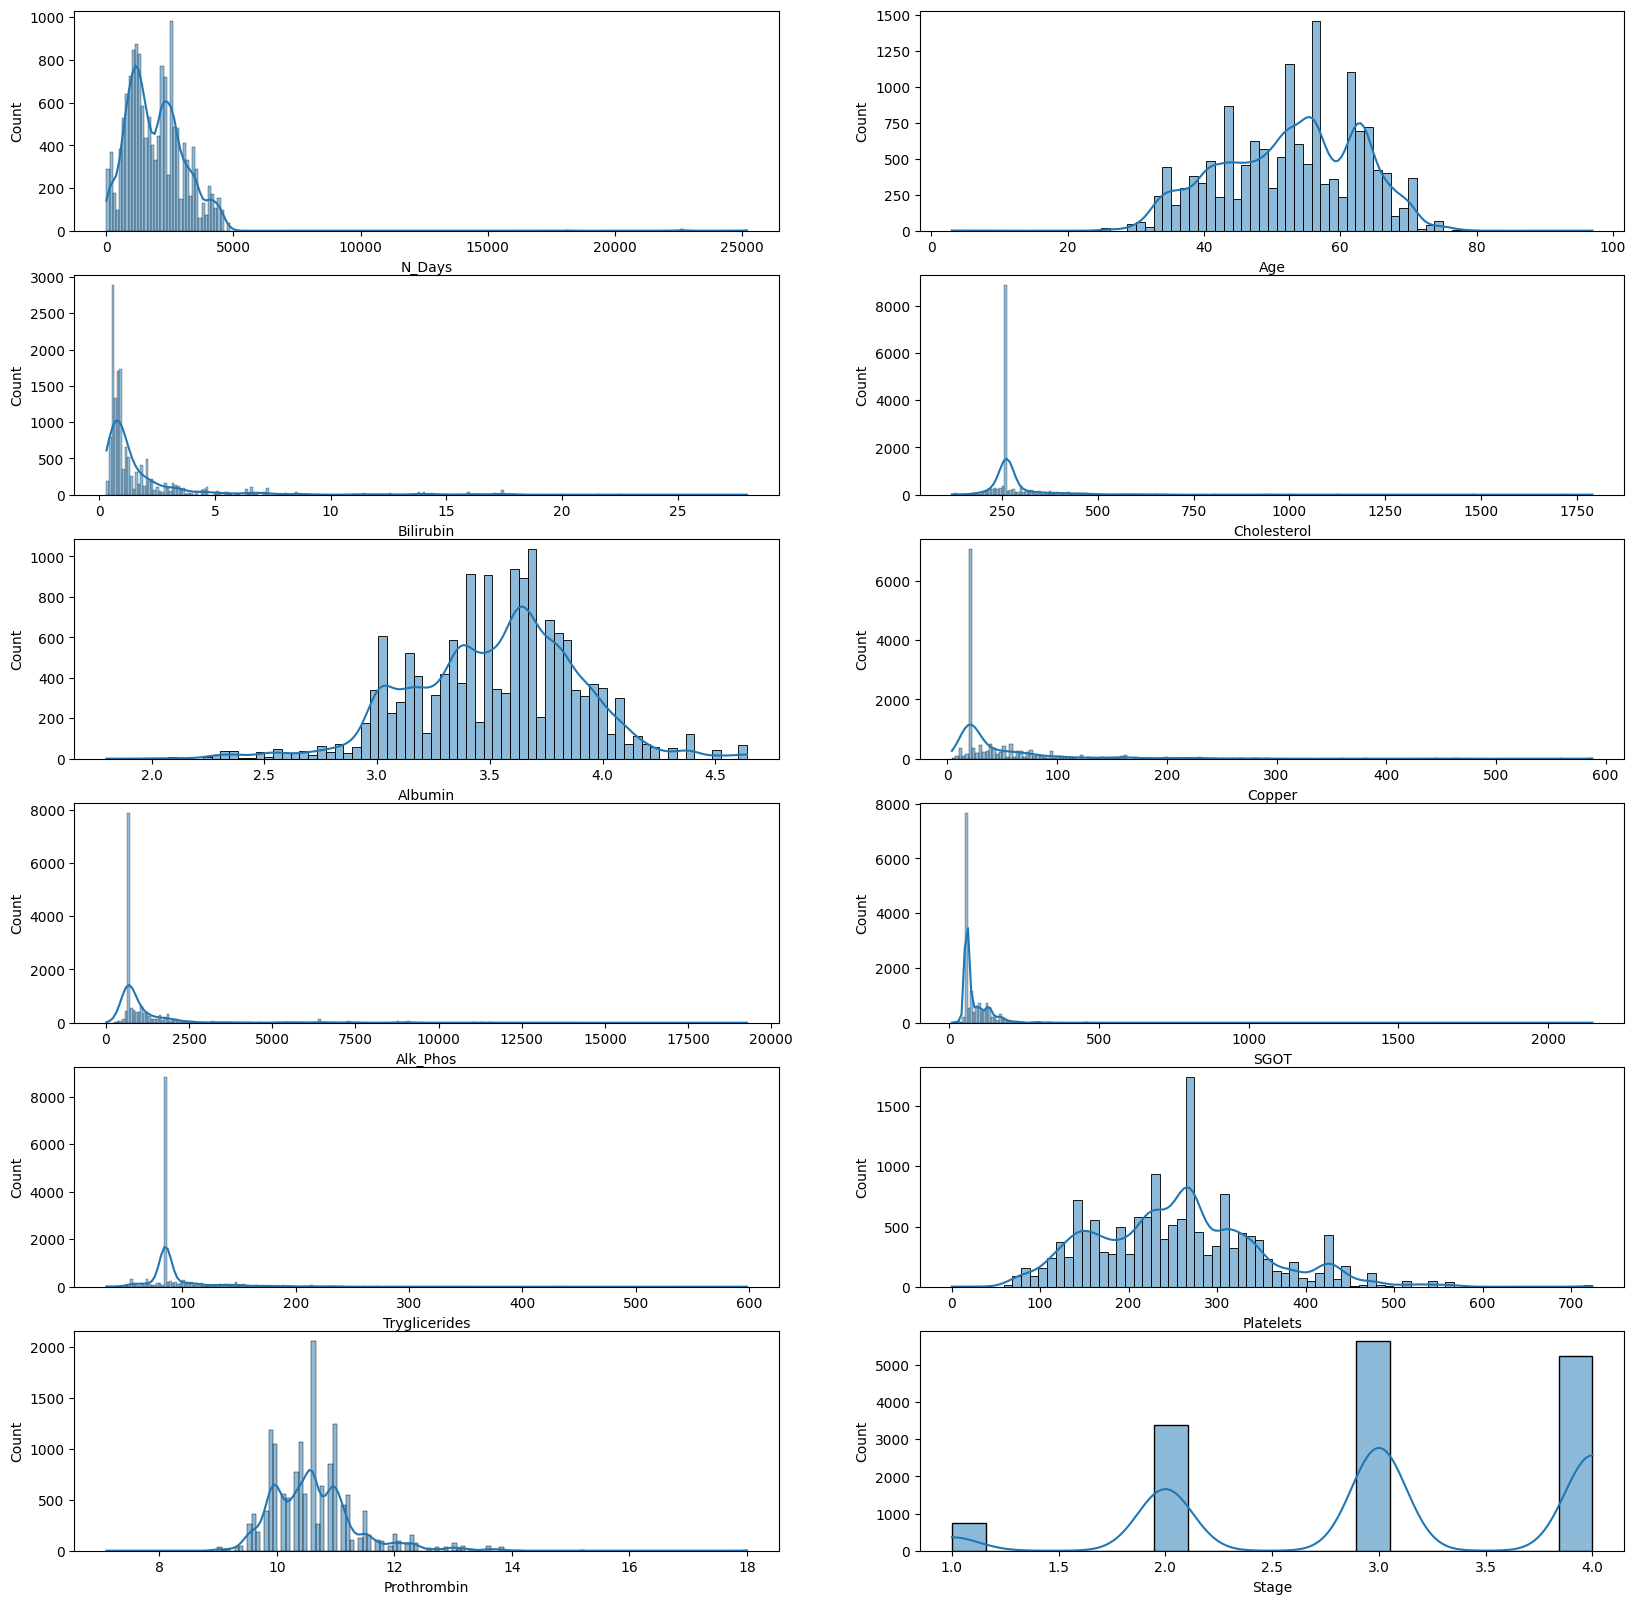

In [218]:
fig, ax = plt.subplots(6,2, figsize = (20,20))
for i, subplots in zip(quant_col, ax.flatten()) :
    sns.histplot(df_train_clean[i], ax = subplots ,palette= 'pastel', kde = True)
fig.show()

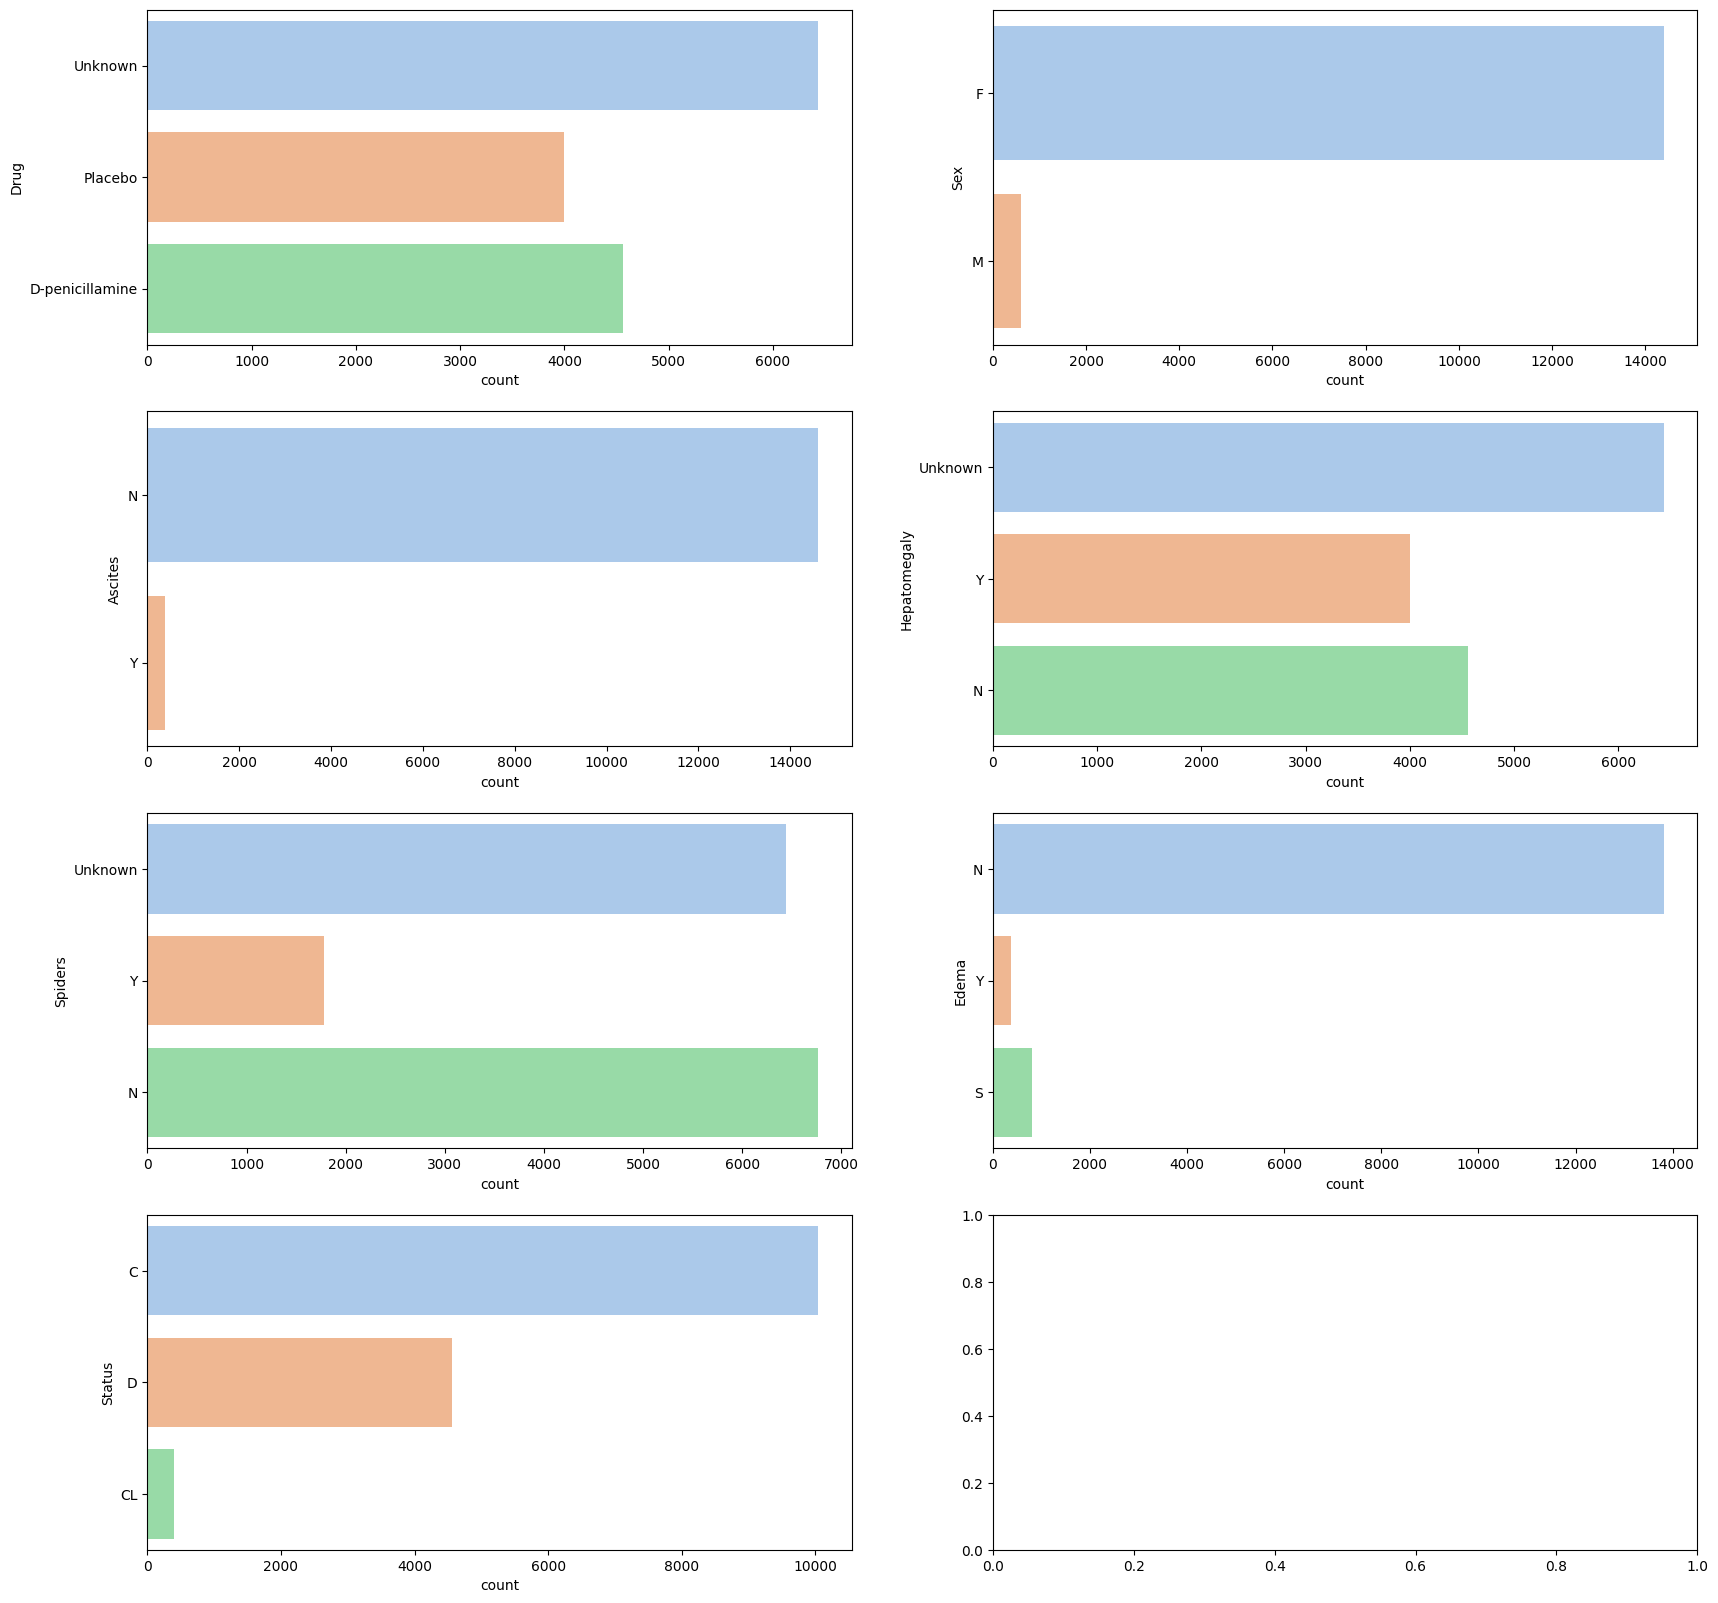

In [191]:
fig, ax = plt.subplots(4,2, figsize = (20,20))
for i, subplots in zip(quali_col, ax.flatten()) :
    sns.countplot(df_train_clean[i], ax = subplots ,palette= 'pastel')
fig.show()

### 2.2. Bivariate Analysis

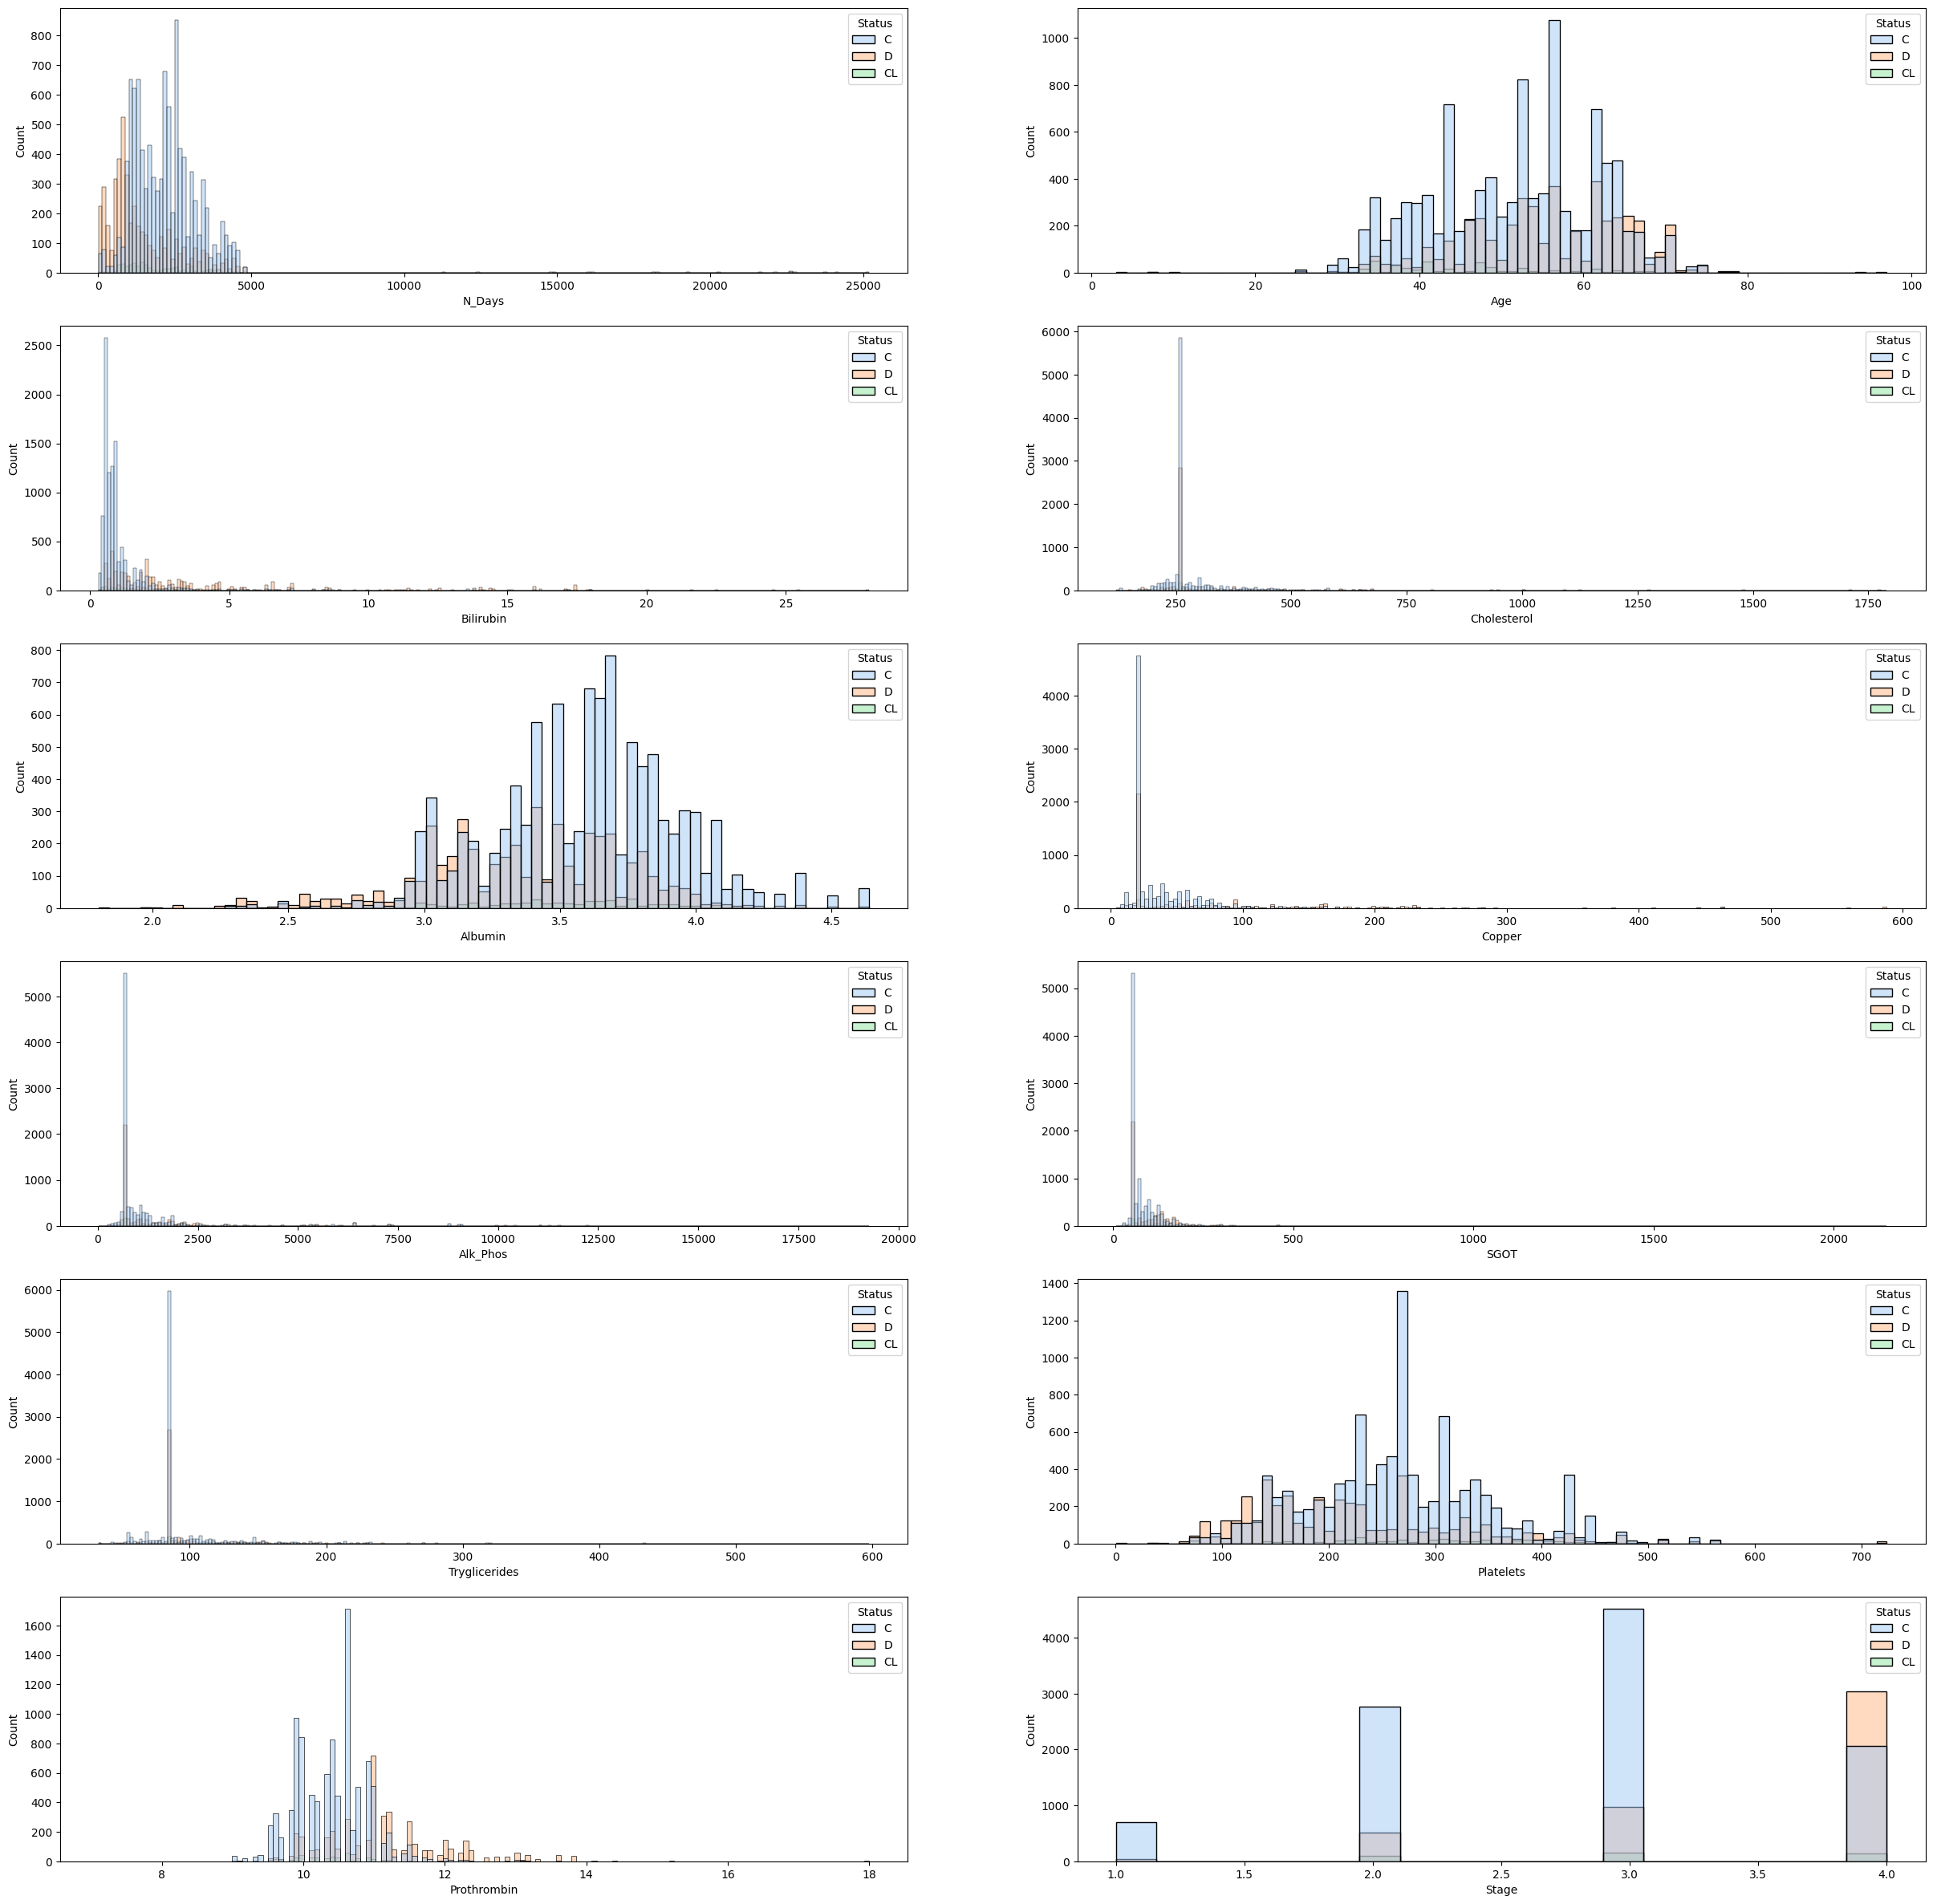

In [226]:
fig, ax = plt.subplots(6,2, figsize = (30,30))
for i, subplots in zip(quant_col, ax.flatten()) :
    sns.histplot(df_train_clean, x = i, hue = 'Status', ax = subplots ,palette= 'pastel')
fig.show()

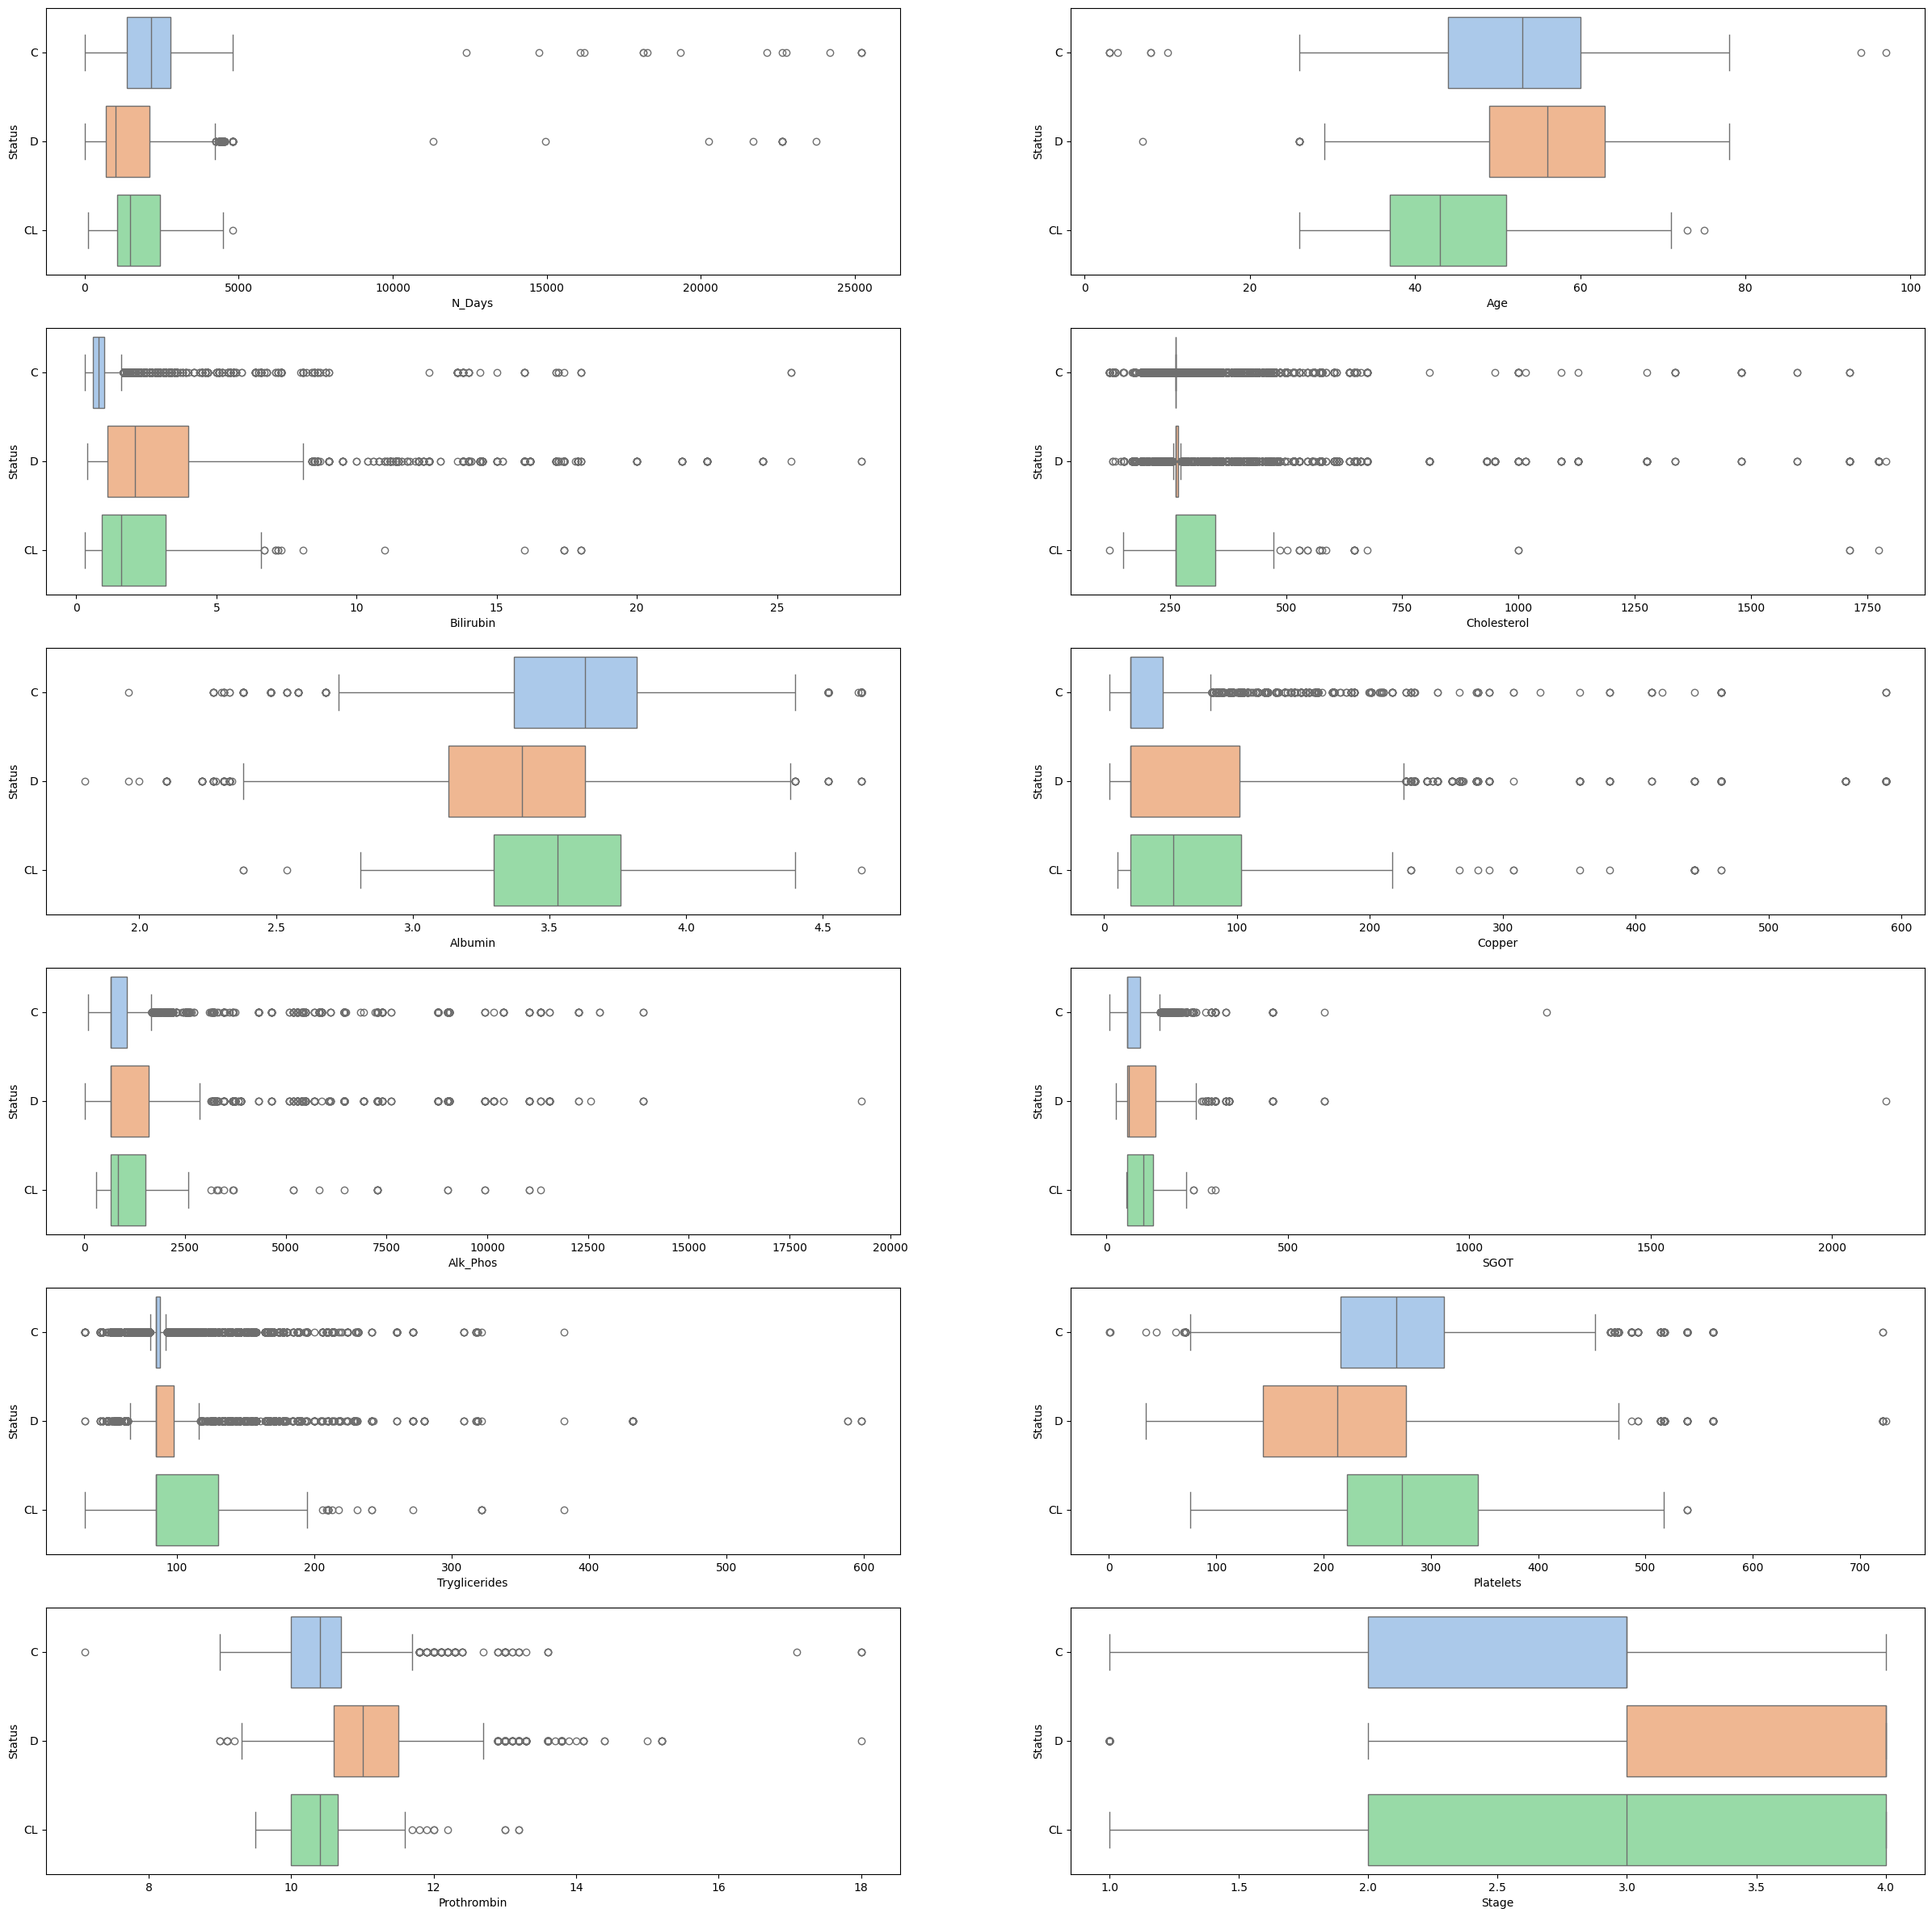

In [227]:
fig, ax = plt.subplots(6,2, figsize = (30,30))
for i, subplots in zip(quant_col, ax.flatten()) :
    sns.boxplot(df_train_clean, x = i, y = 'Status', ax = subplots ,palette= 'pastel')
fig.show()

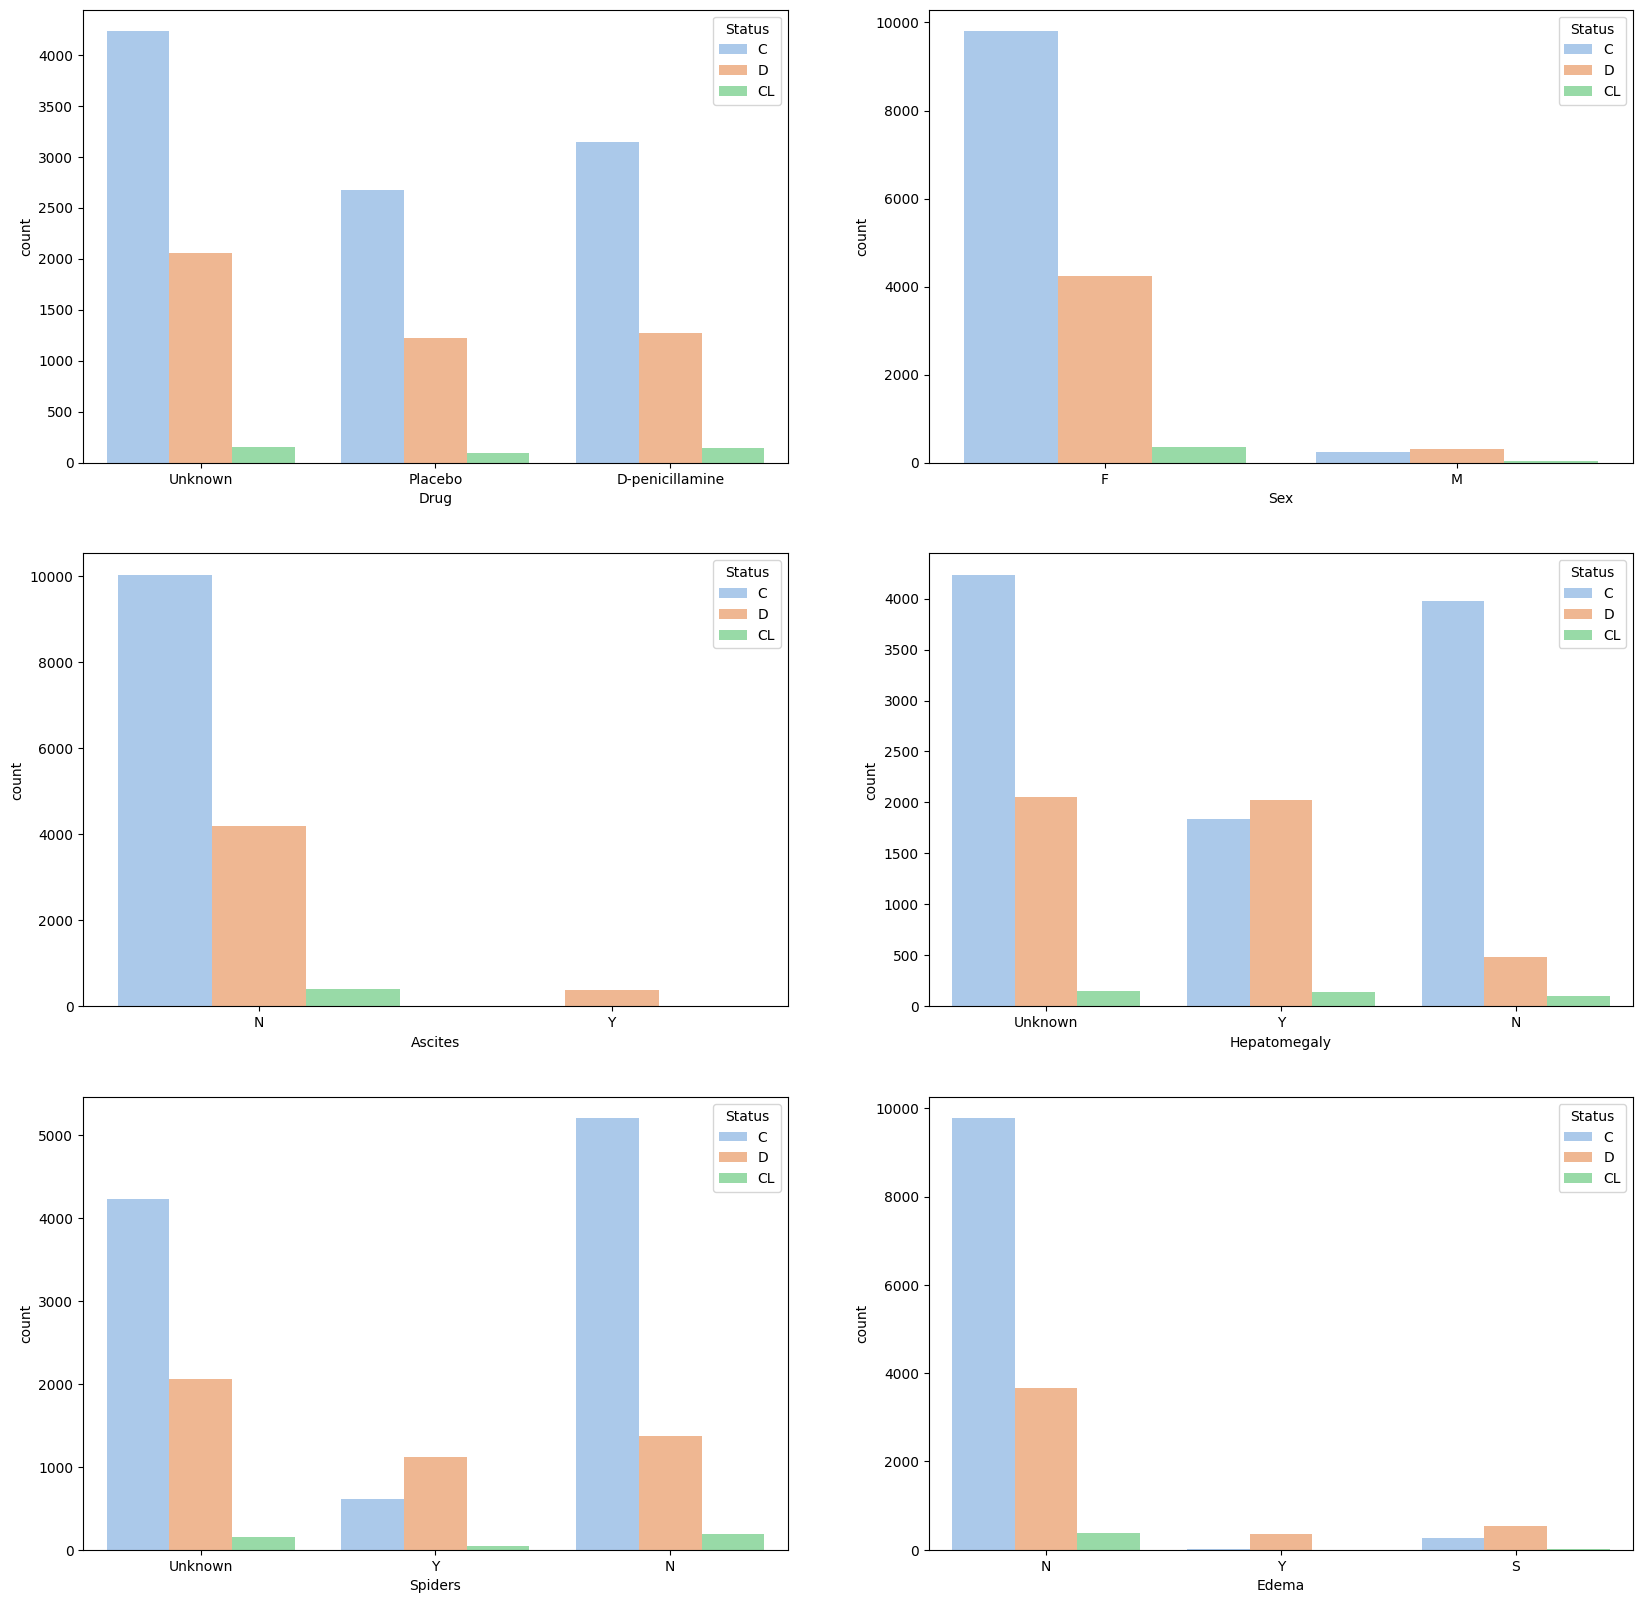

In [223]:
fig, ax = plt.subplots(3,2, figsize = (20,20))
for i, subplots in zip(quali_col[:-1], ax.flatten()) :
    sns.countplot(df_train_clean, x = i, hue = 'Status', ax = subplots ,palette= 'pastel')
fig.show()

### 2.3. Multivariate Analysis

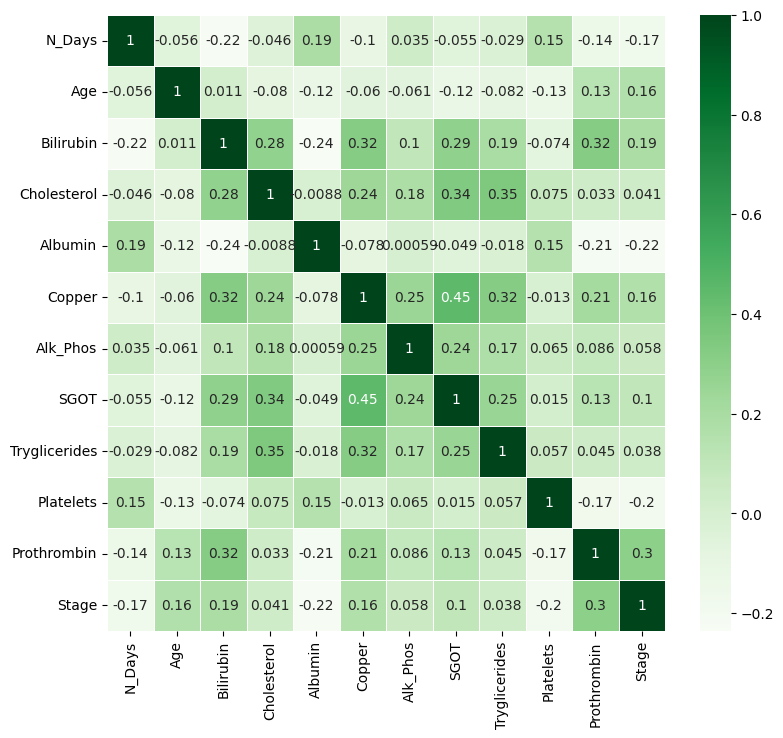

In [202]:
plt.figure(figsize = (9,8))
sns.heatmap(df_train_clean[quant_col].corr(), annot = True, linewidth=.5, cmap = 'Greens')
plt.show()

## 3. Feature Engineering

### 3.1. Variables Encoding

### 3.2. Feature Selection

## 4. Modelling

## 5. Results